# MLP Básica (Core)

 Descripción:

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset “Breast Cancer Wisconsin (Diagnostic)” disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## Objetivo:

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

Información sobre atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32)

Se calculan diez características de valor real para cada núcleo celular:

a) radio (media de las distancias del centro a los puntos del perímetro)

b) textura (desviación estándar de los valores en escala de grises)

c) perímetro

d) área

e) suavidad (variación local de las longitudes de los radios)

f) compacidad (perímetro^2 / área - 1,0)

g) concavidad (gravedad de las partes cóncavas del contorno)

h) puntos cóncavos (número de porciones cóncavas del contorno)

i) simetría

j) dimensión fractal («aproximación de la línea de costa» - 1)

Se calcularon la media, el error estándar y el «peor» o mayor (media de los tres
(media de los tres valores más grandes) de estas características, resultando 30 características. Por ejemplo, el campo 3 es el radio medio, el campo 13 es el Radio SE, el campo 23 es el Peor Radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

Valores de atributo perdidos: ninguno

Distribución por clases: 357 benignos, 212 malignos

# 1. Carga de datos:

  – Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
  
  – Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/8_Core_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [87]:
# Verificando si hay datos nulos (%)
print("Valores nulos:")
print((df.isnull().sum() * 100 / len(df)).round(2))
print("\n")

# Verificando si hay duplicados
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

Valores nulos:
id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst        

In [88]:
df = df.drop(columns=['Unnamed: 32', 'id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [89]:
df.describe().round()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0
max,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0


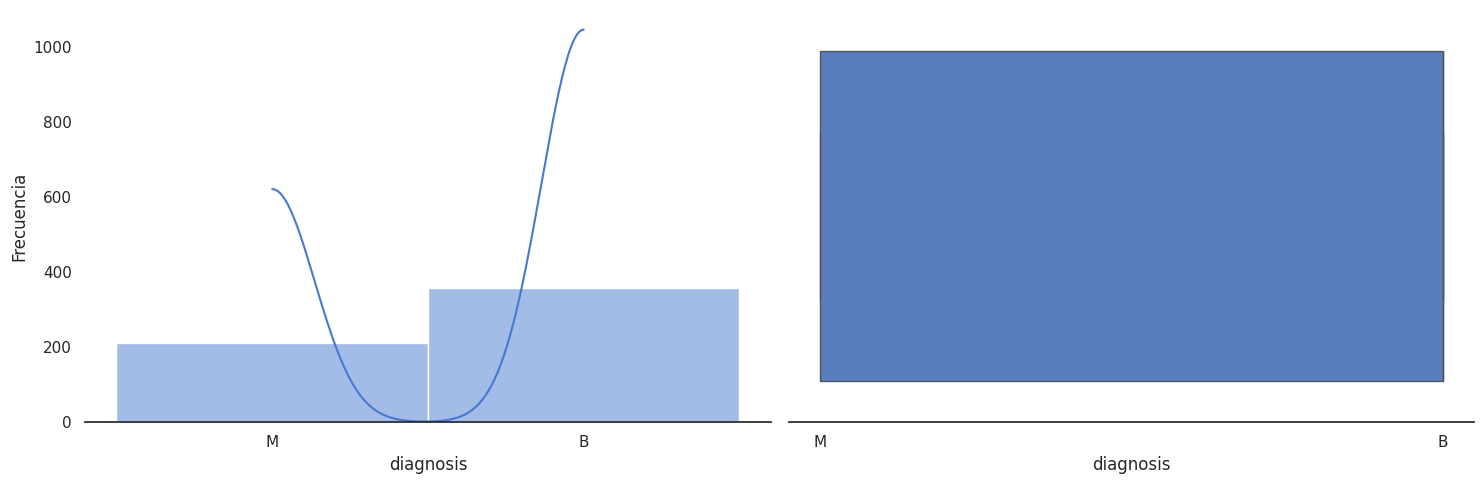

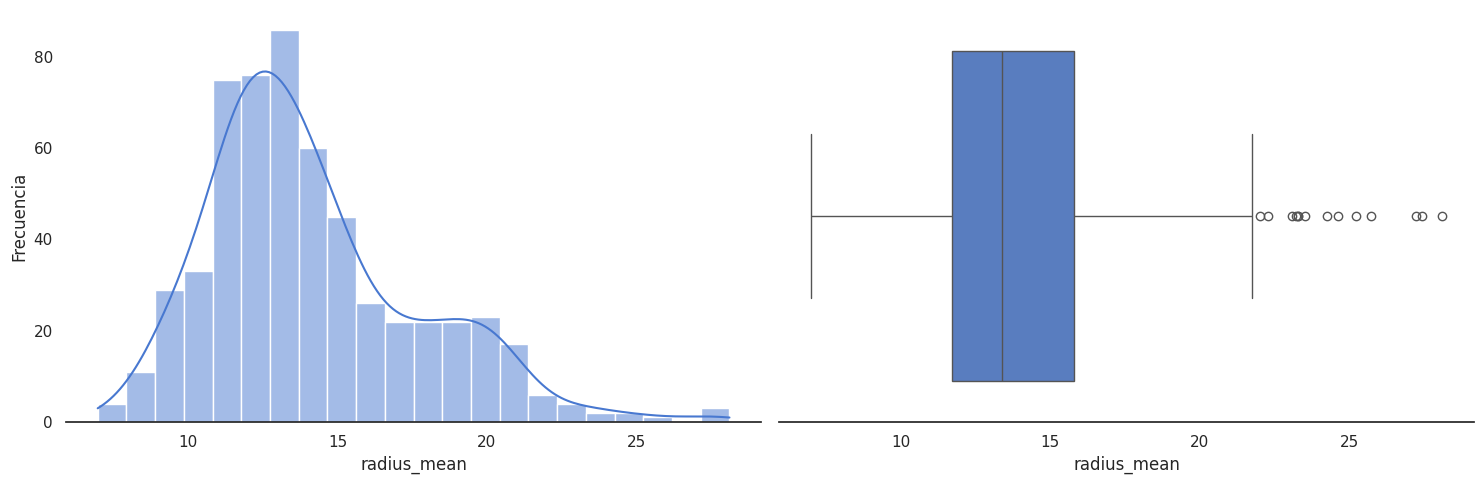

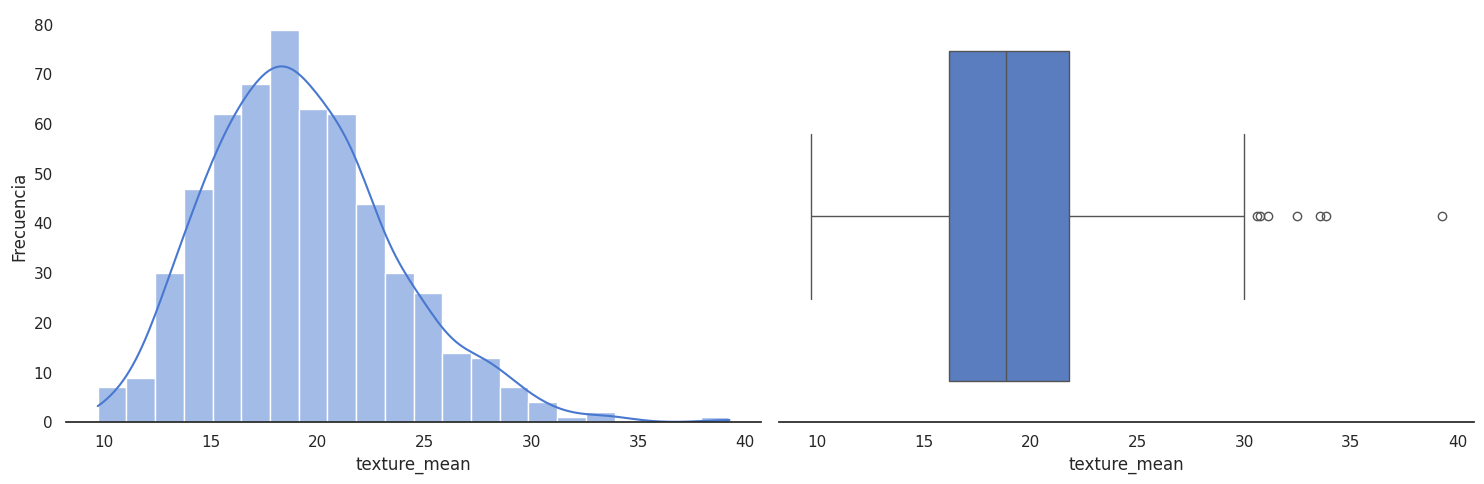

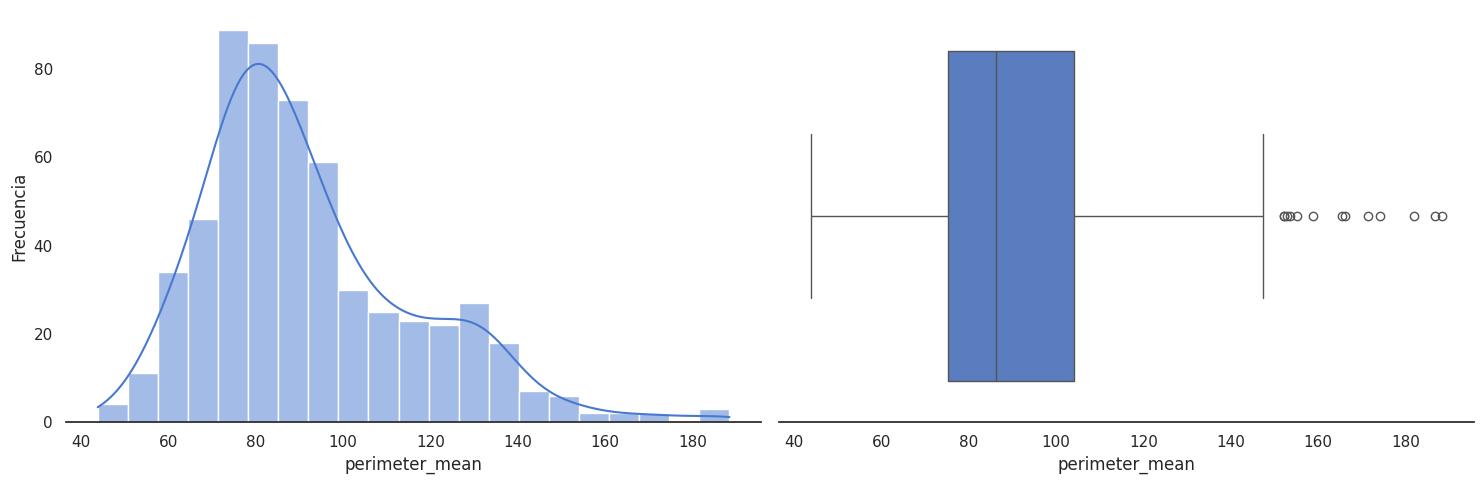

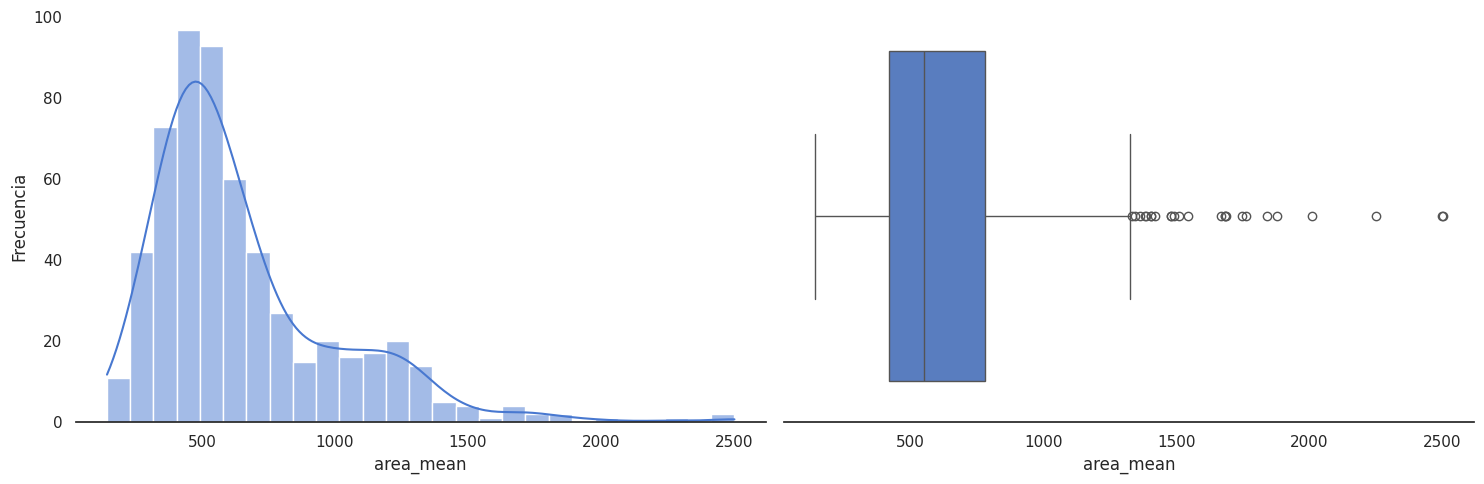

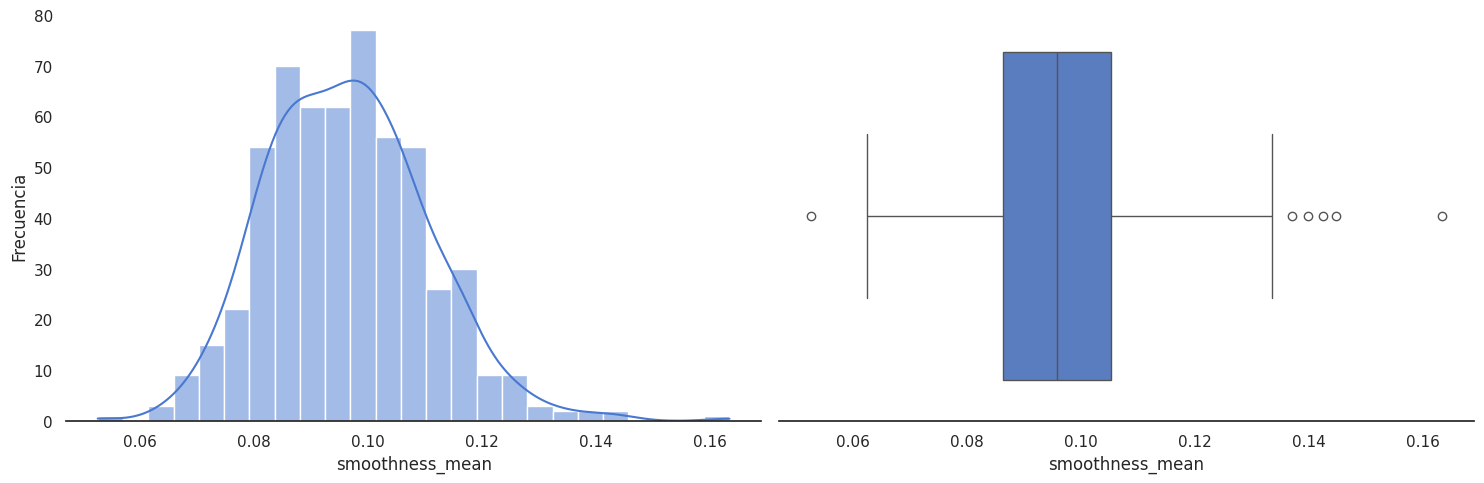

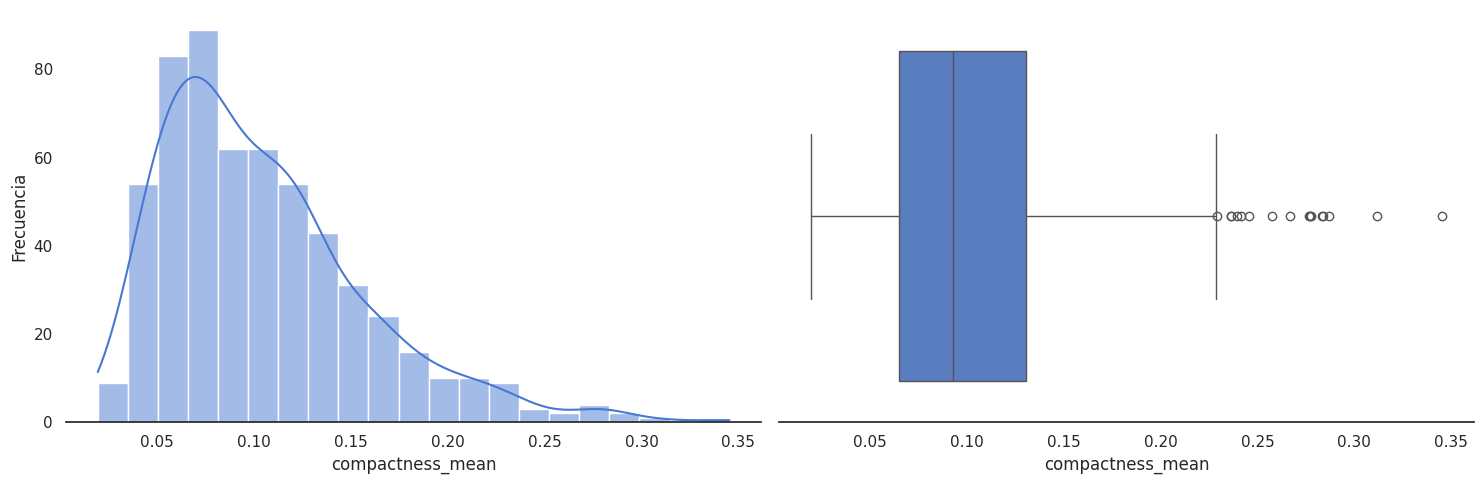

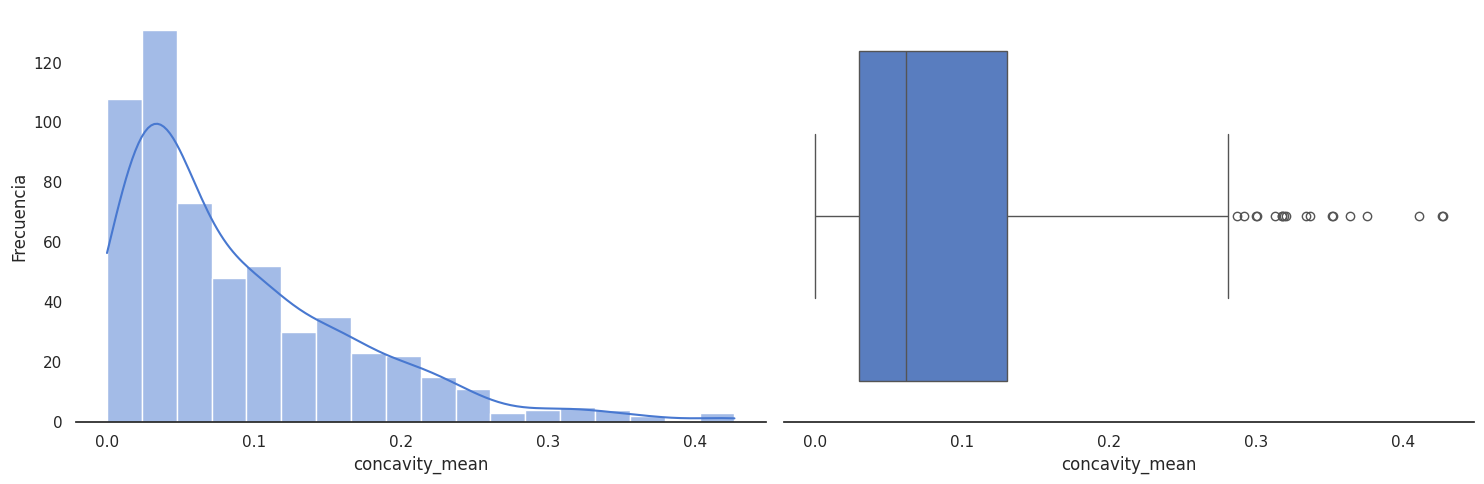

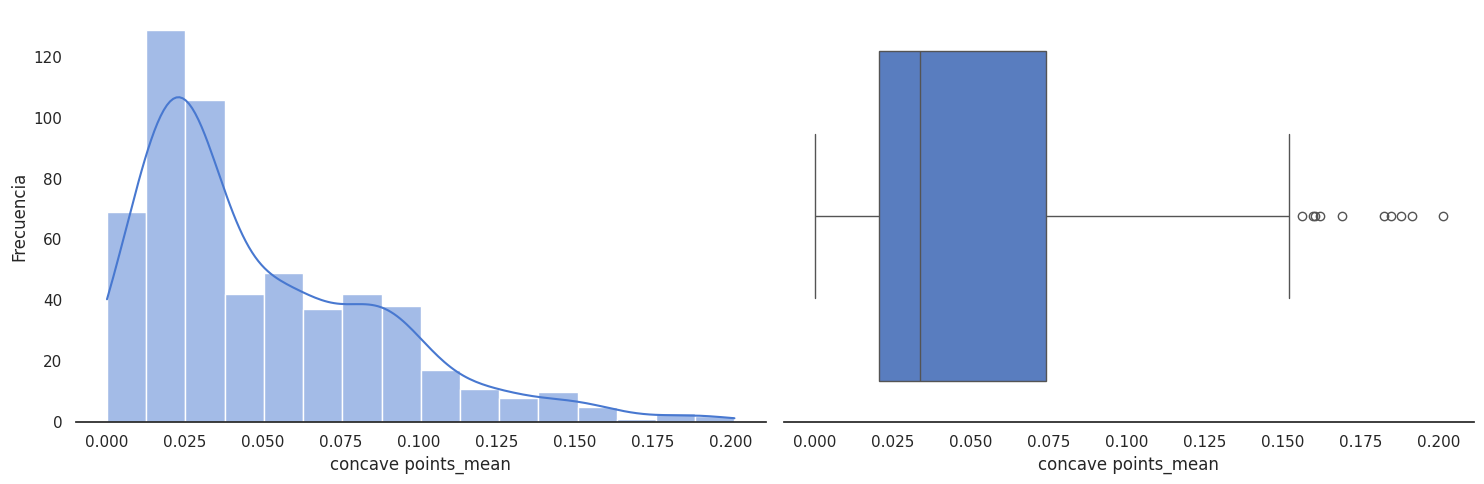

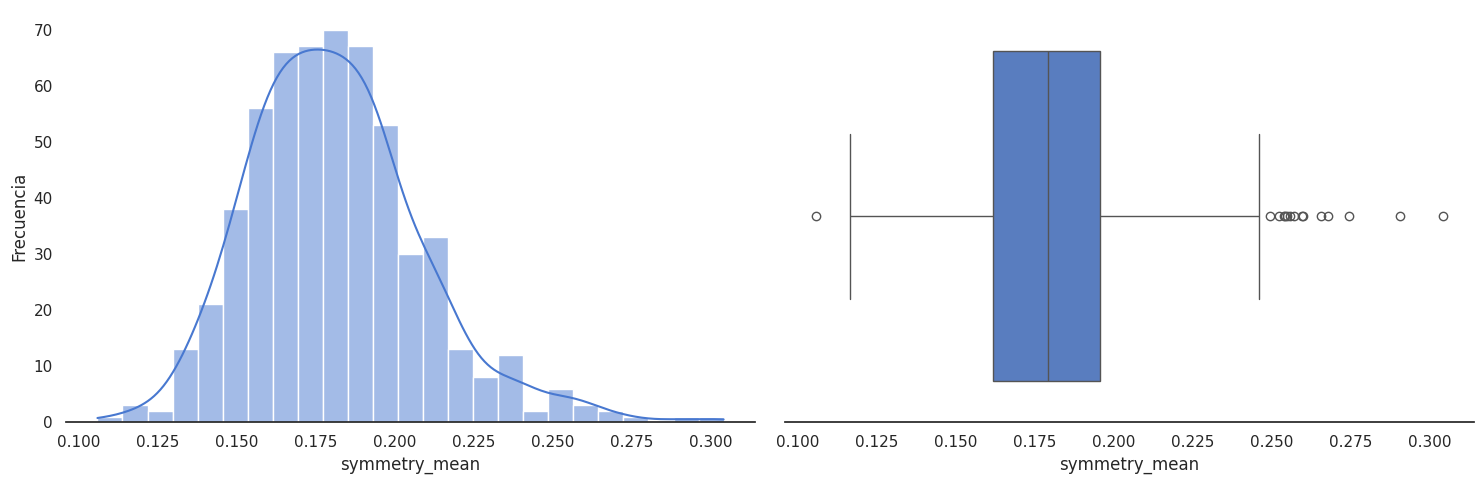

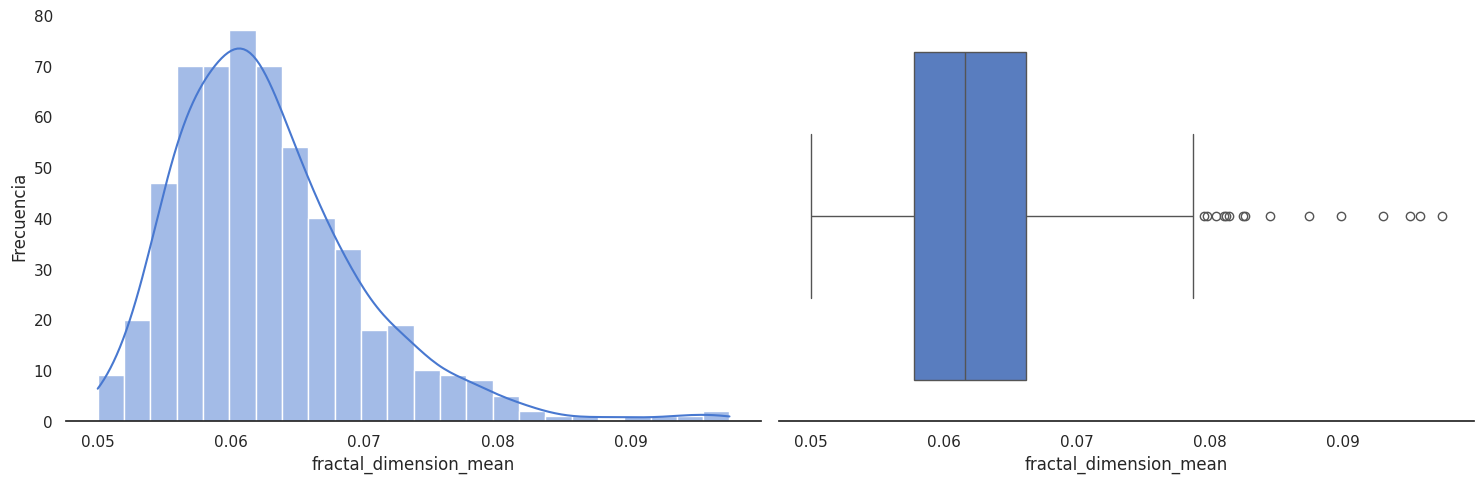

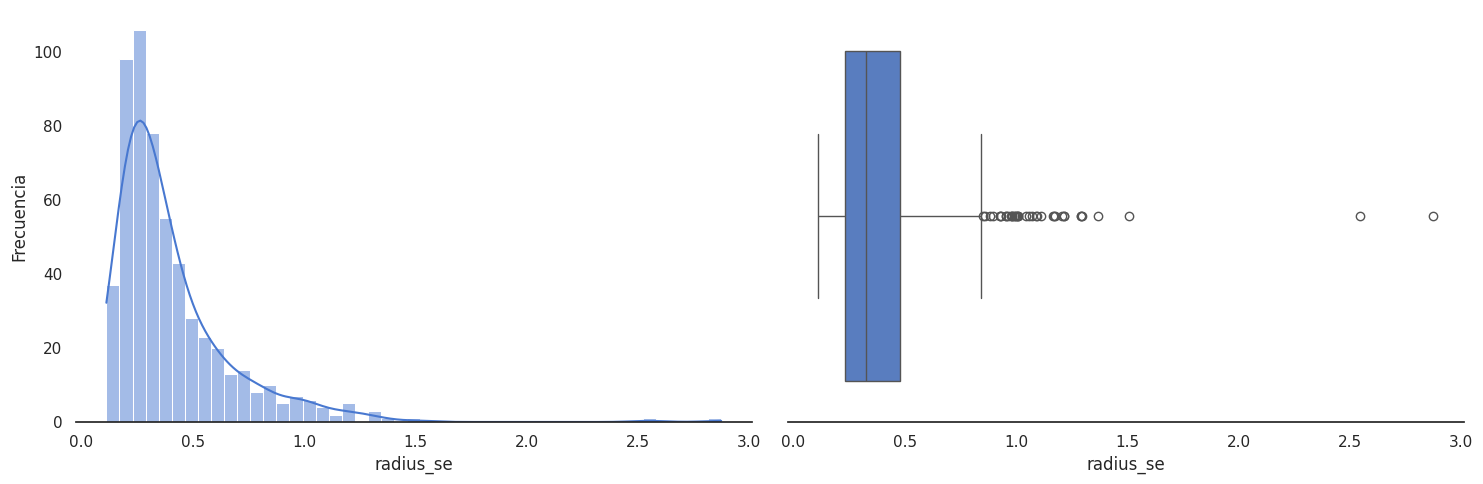

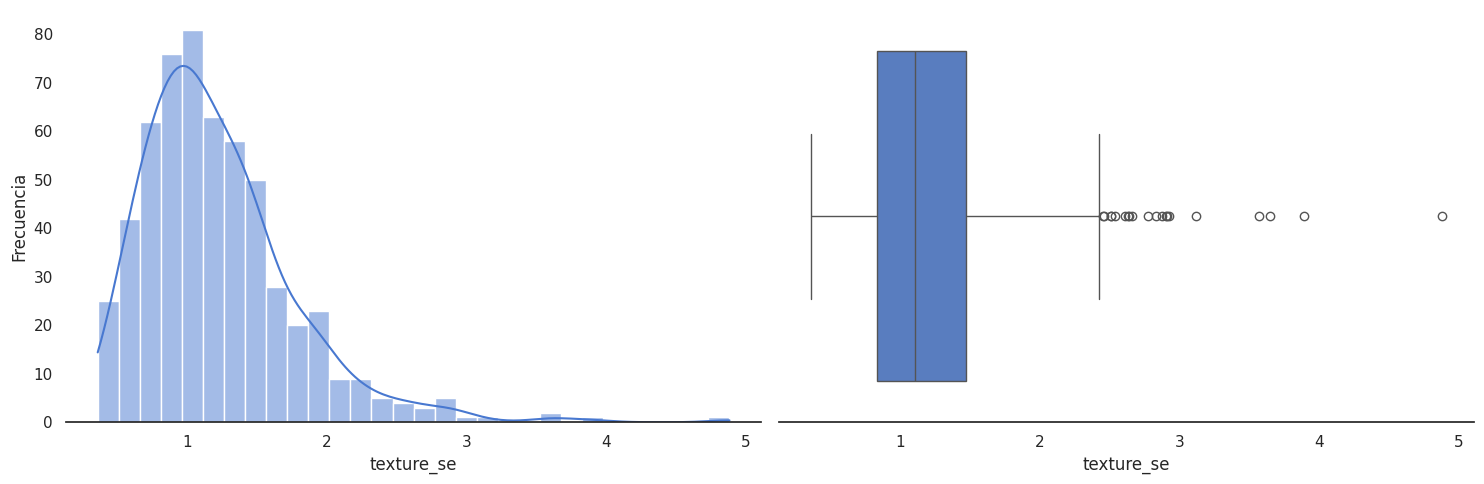

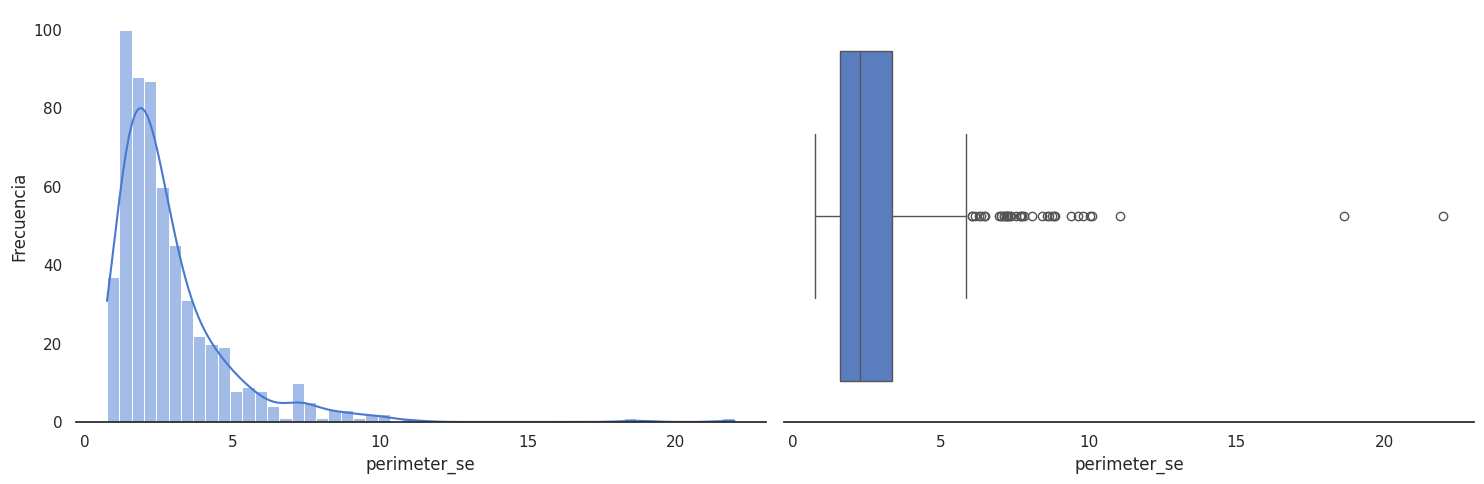

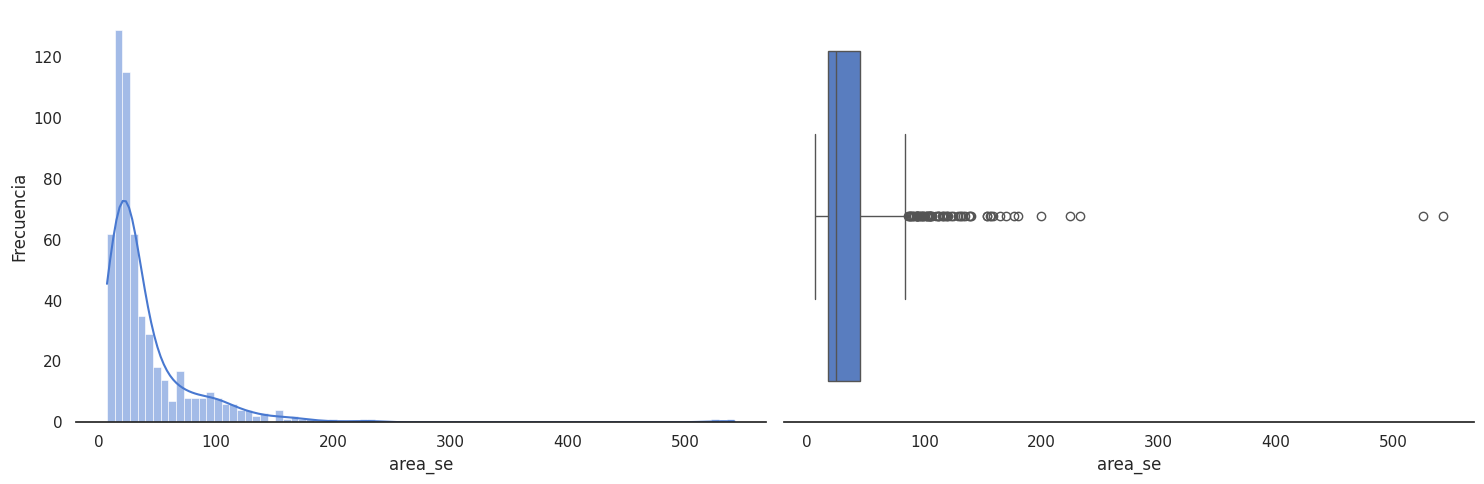

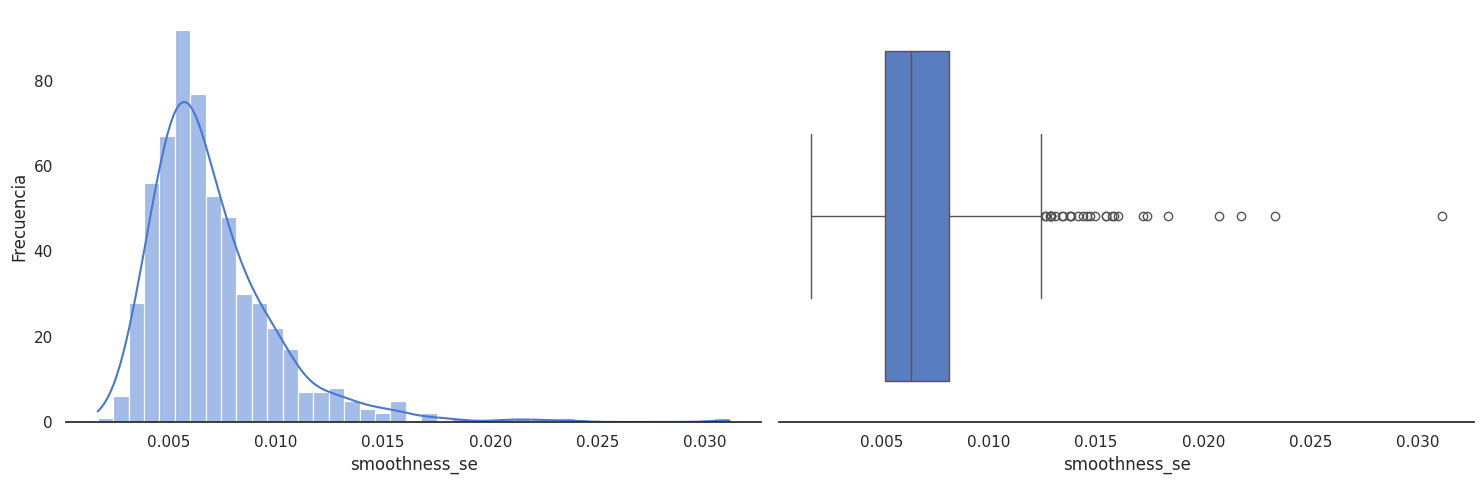

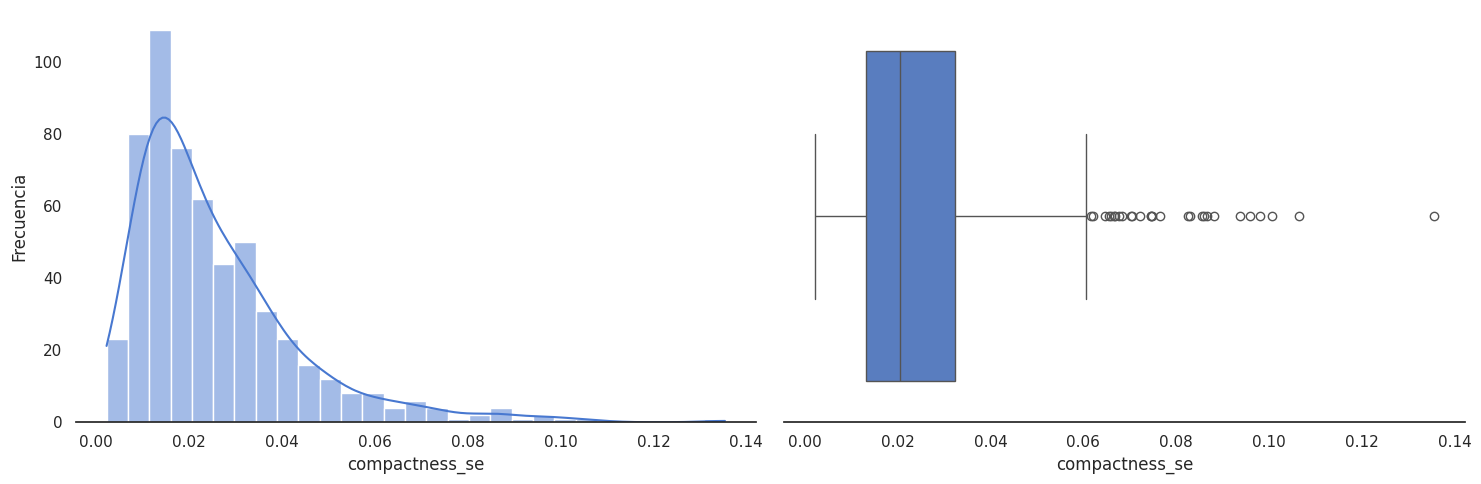

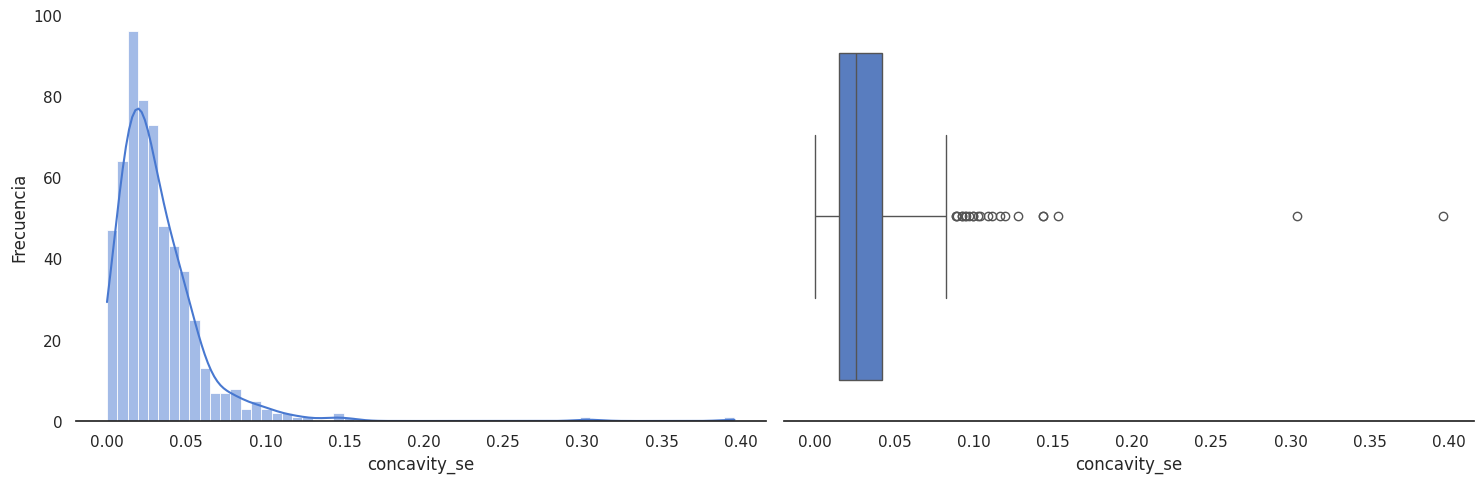

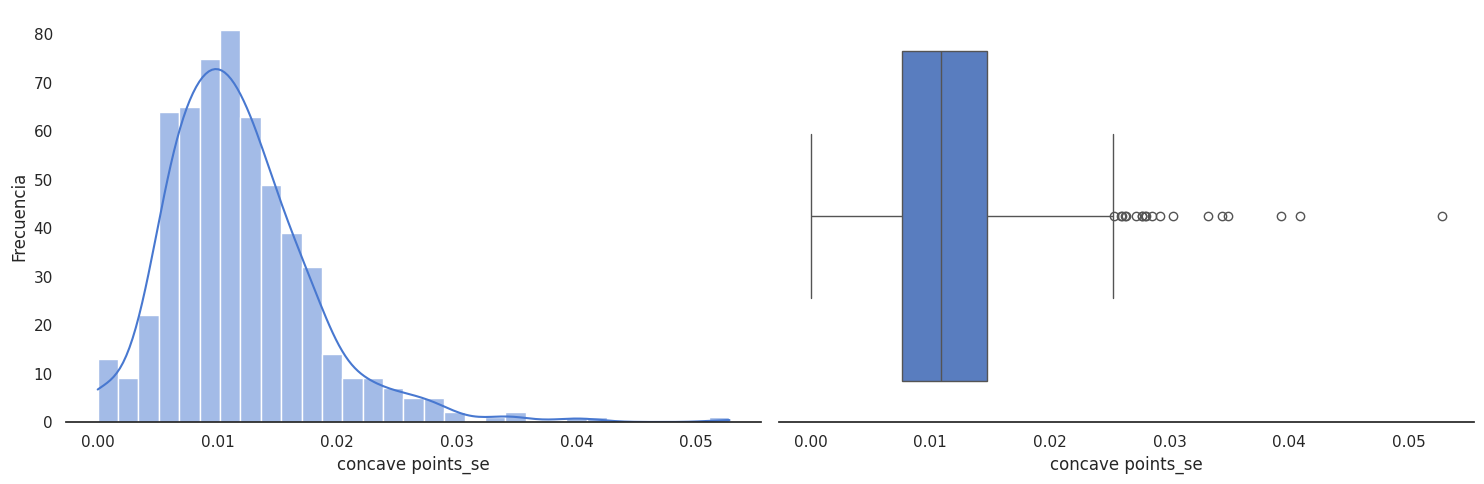

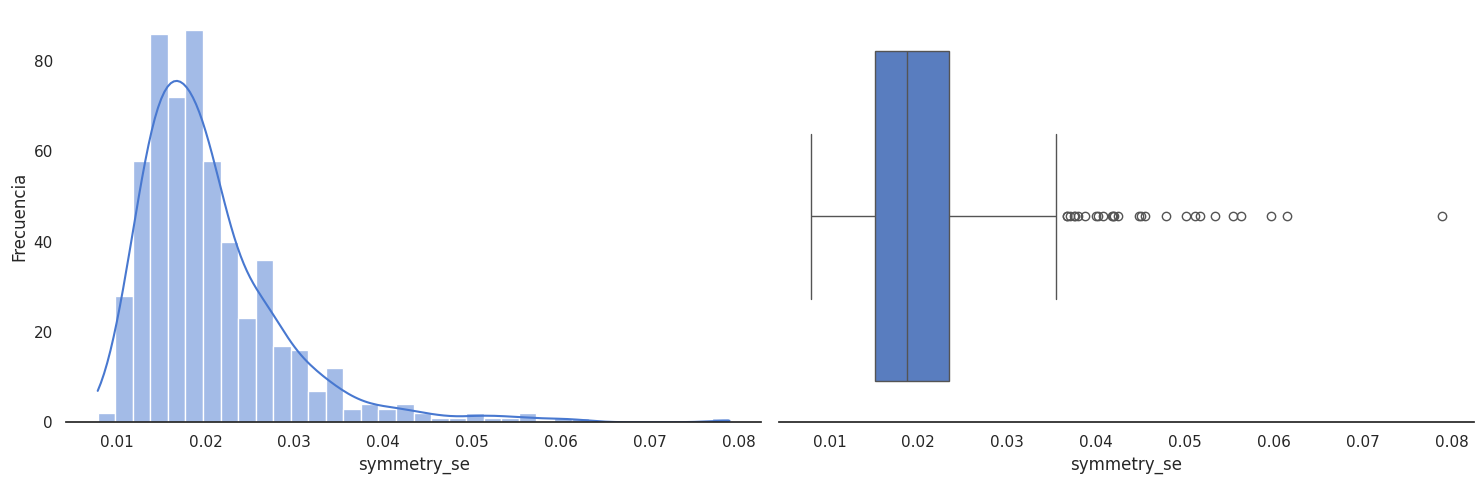

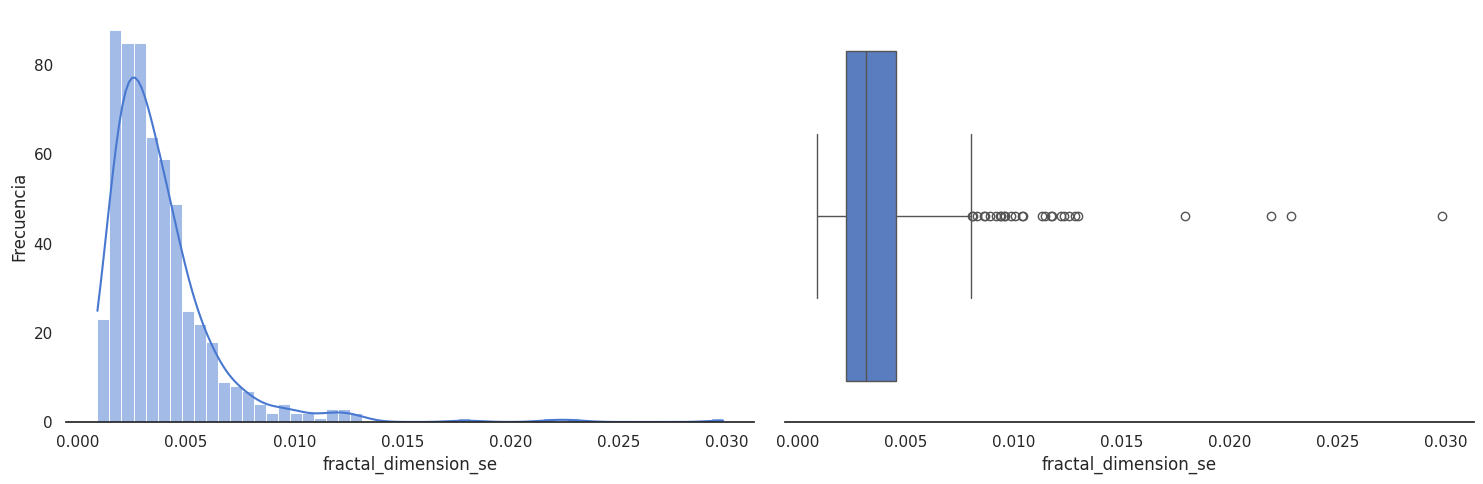

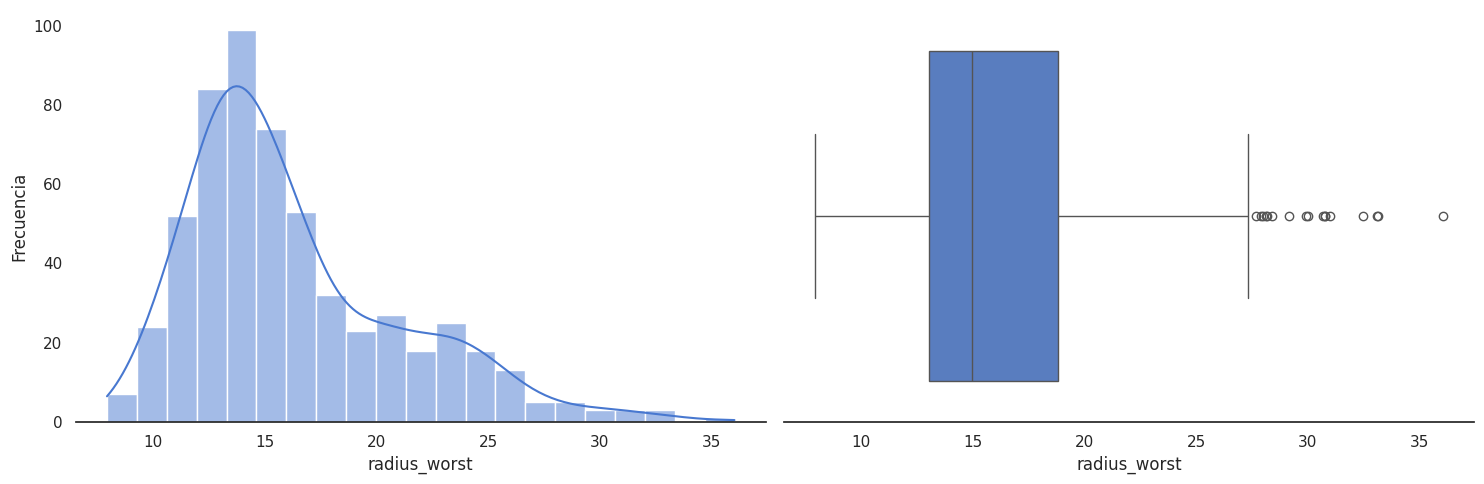

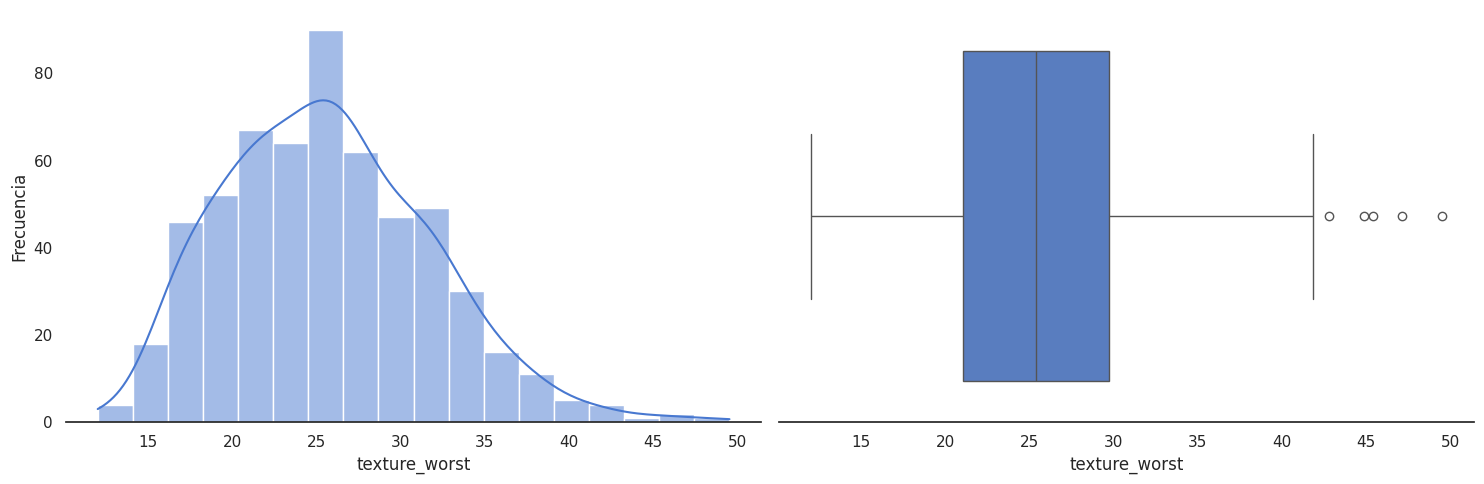

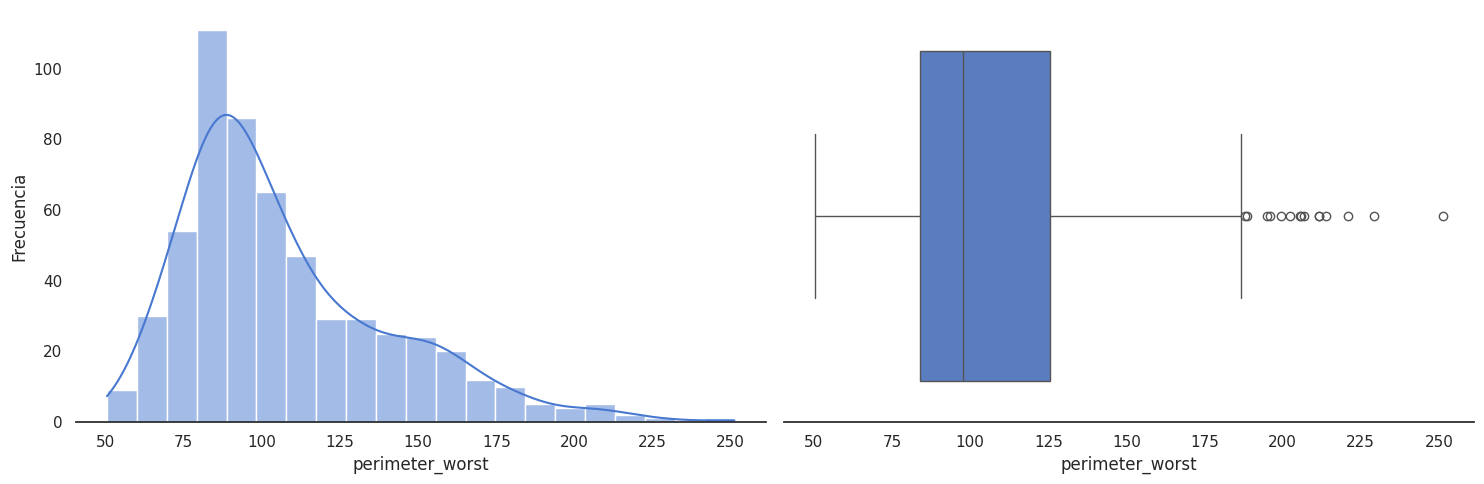

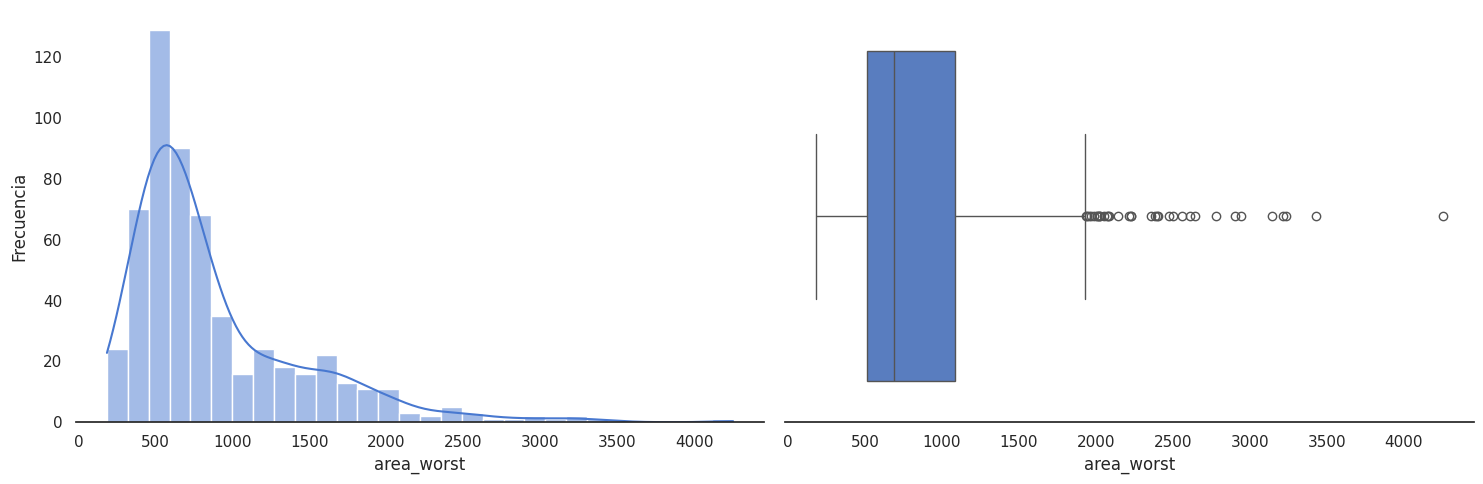

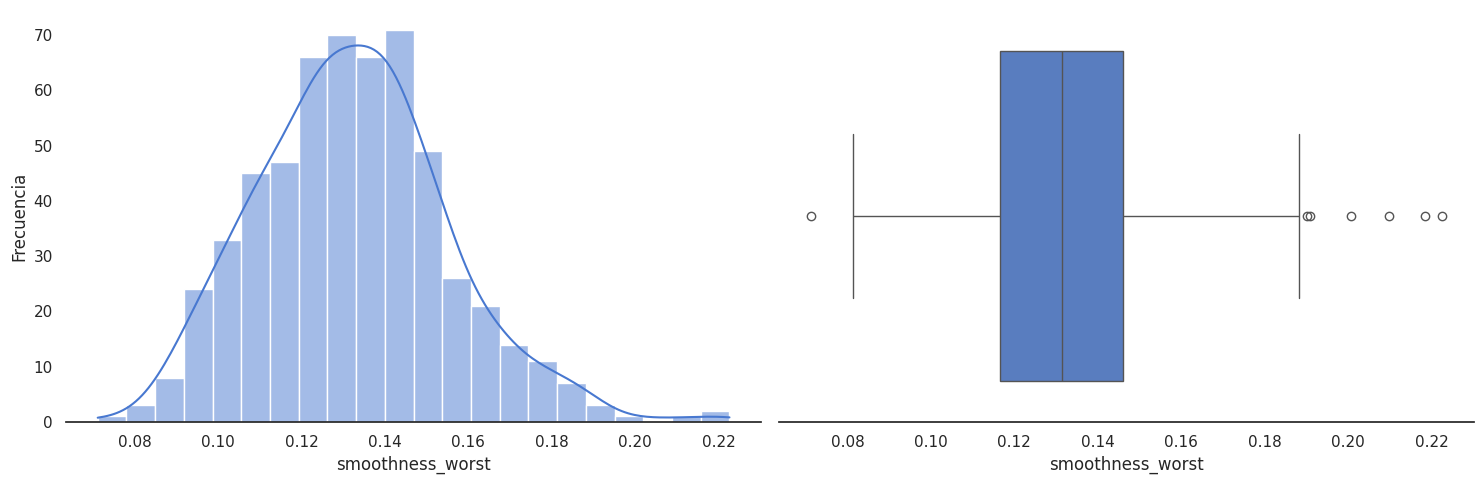

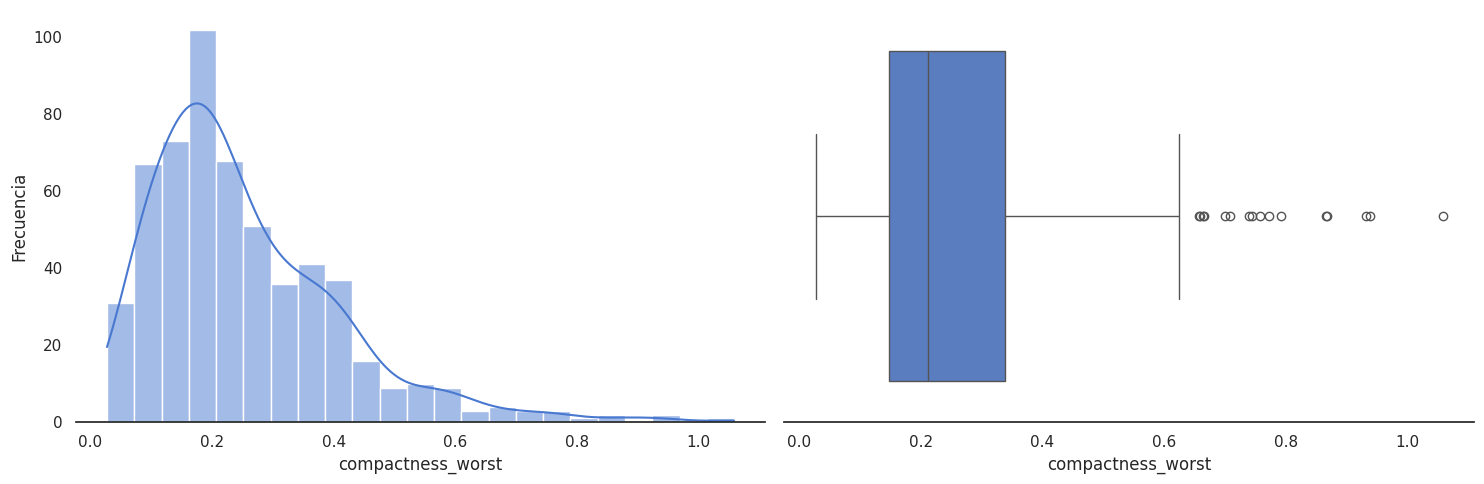

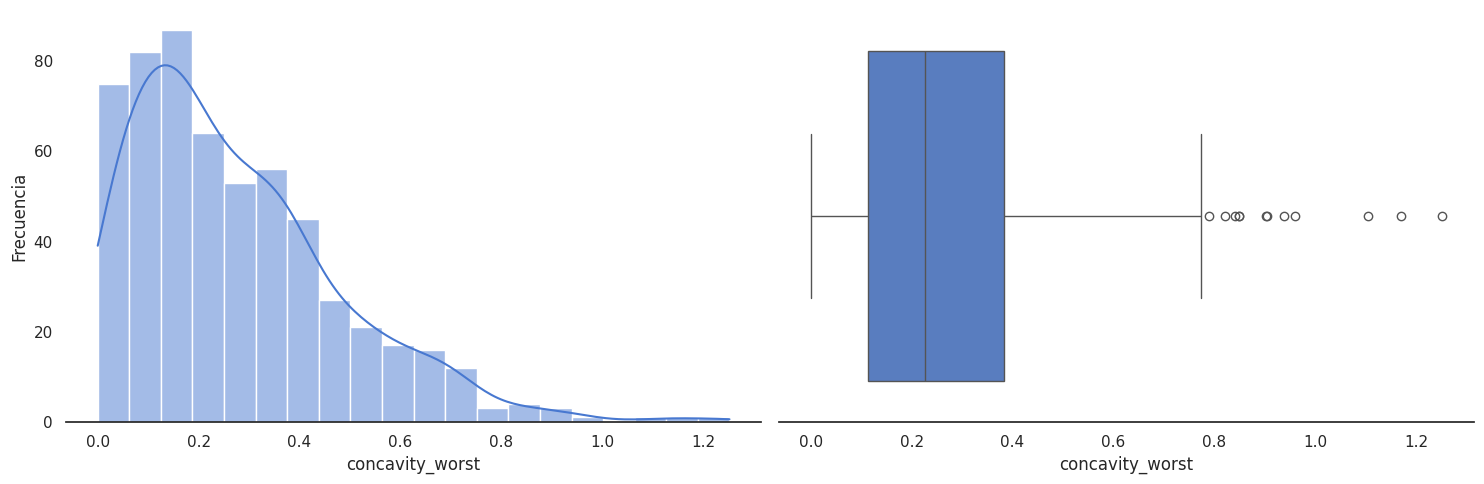

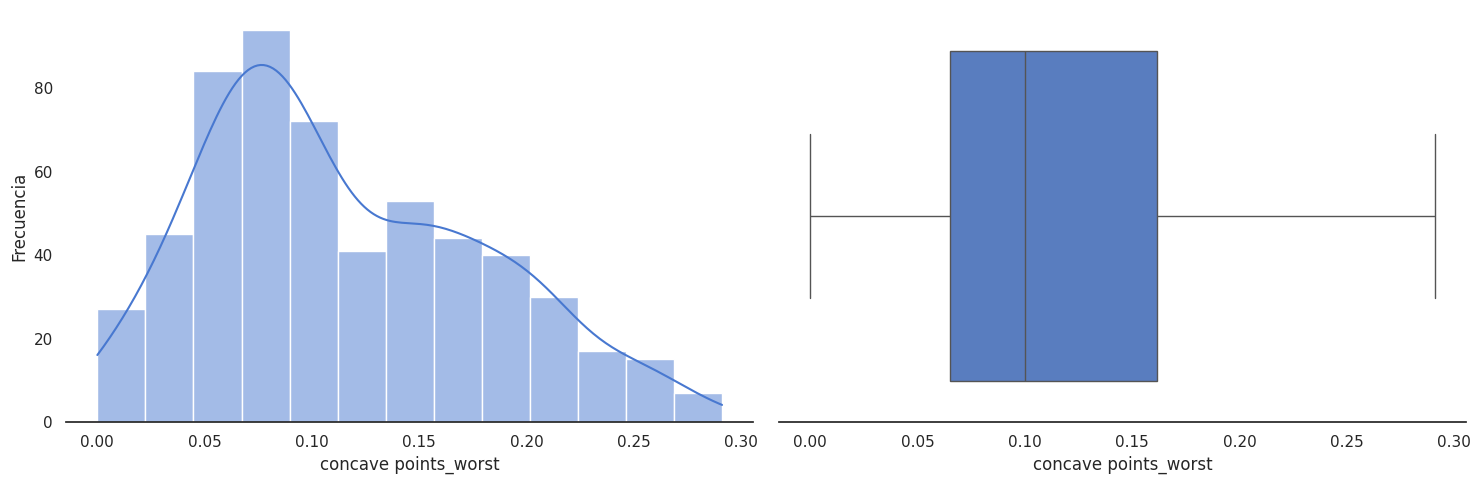

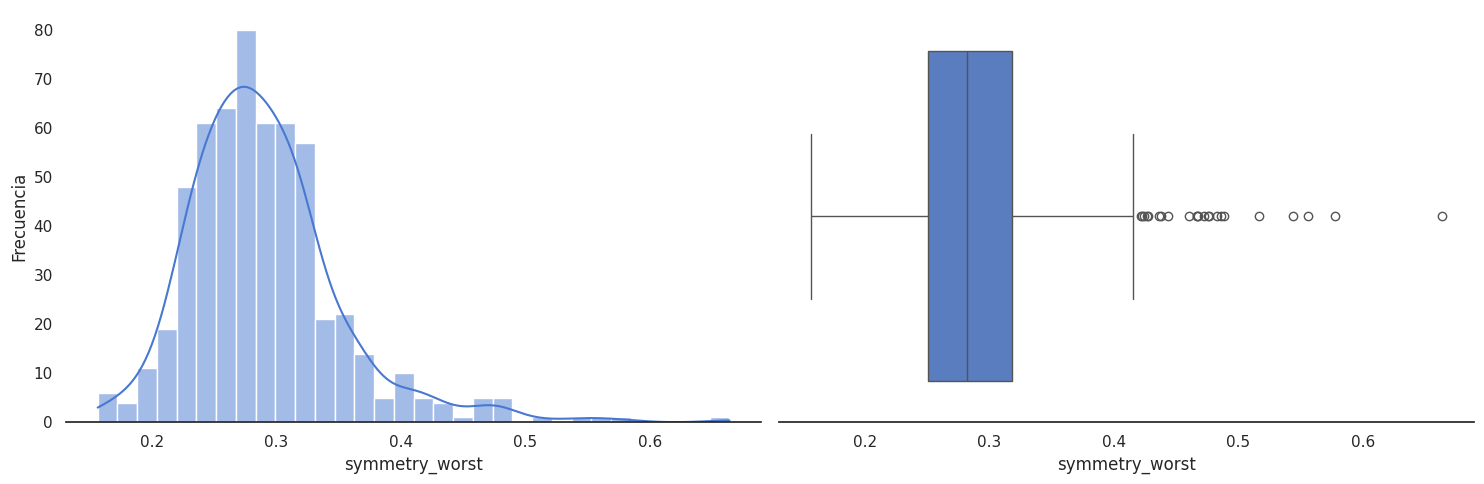

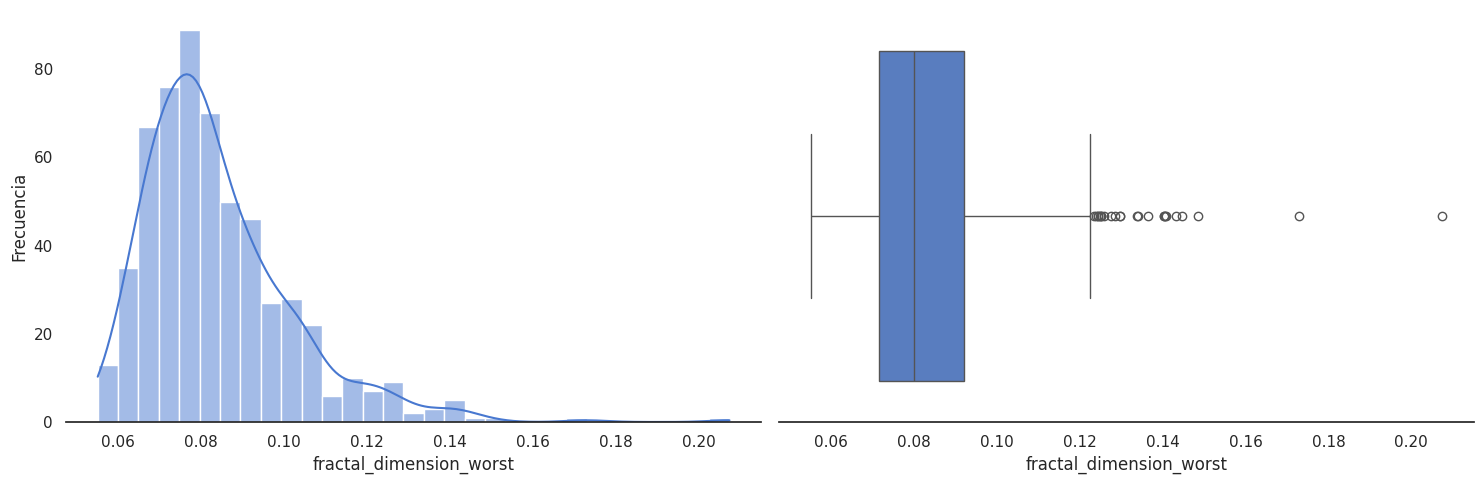

In [90]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

In [91]:
# Detectar outliers en variables numéricas
def outliers_IQR(df):
    # Filtrar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1               # Rango intercuartílico

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Llamar a la función
outliers_IQR(df)


🚩 Outliers detected in radius_mean: 14

🚩 Outliers detected in texture_mean: 7

🚩 Outliers detected in perimeter_mean: 13

🚩 Outliers detected in area_mean: 25

🚩 Outliers detected in smoothness_mean: 6

🚩 Outliers detected in compactness_mean: 16

🚩 Outliers detected in concavity_mean: 18

🚩 Outliers detected in concave points_mean: 10

🚩 Outliers detected in symmetry_mean: 15

🚩 Outliers detected in fractal_dimension_mean: 15

🚩 Outliers detected in radius_se: 38

🚩 Outliers detected in texture_se: 20

🚩 Outliers detected in perimeter_se: 38

🚩 Outliers detected in area_se: 65

🚩 Outliers detected in smoothness_se: 30

🚩 Outliers detected in compactness_se: 28

🚩 Outliers detected in concavity_se: 22

🚩 Outliers detected in concave points_se: 19

🚩 Outliers detected in symmetry_se: 27

🚩 Outliers detected in fractal_dimension_se: 28

🚩 Outliers detected in radius_worst: 17

🚩 Outliers detected in texture_worst: 5

🚩 Outliers detected in perimeter_worst: 15

🚩 Outliers detected in ar

In [93]:
# Transformación logarítmica
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    # Apply log transformation, adding 1 to avoid log(0) errors
    df[col] = np.log1p(df[col])


In [94]:
outliers_IQR(df)


🚩 Outliers detected in radius_mean: 7

🚩 Outliers detected in texture_mean: 2

🚩 Outliers detected in perimeter_mean: 6

🚩 Outliers detected in area_mean: 5

🚩 Outliers detected in smoothness_mean: 6

🚩 Outliers detected in compactness_mean: 15

🚩 Outliers detected in concavity_mean: 14

🚩 Outliers detected in concave points_mean: 8

🚩 Outliers detected in symmetry_mean: 15

🚩 Outliers detected in fractal_dimension_mean: 15

🚩 Outliers detected in radius_se: 31

🚩 Outliers detected in texture_se: 9

🚩 Outliers detected in perimeter_se: 13

🚩 Outliers detected in area_se: 7

🚩 Outliers detected in smoothness_se: 29

🚩 Outliers detected in compactness_se: 26

🚩 Outliers detected in concavity_se: 22

🚩 Outliers detected in concave points_se: 18

🚩 Outliers detected in symmetry_se: 27

🚩 Outliers detected in fractal_dimension_se: 28

🚩 Outliers detected in radius_worst: 4

🚩 Outliers detected in texture_worst: 2

🚩 Outliers detected in perimeter_worst: 2

🚩 Outliers detected in area_worst

In [95]:
# Función para eliminar outliers en todas las columnas numéricas usando IQR
def eliminar_outliers_iqr(df):
    df_filtrado = df.copy()  # Copiar para no modificar el original
    for col in df.select_dtypes(include=['number']).columns:  # Solo columnas numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]
    return df_filtrado

# Aplicar la función
df_sin_outliers = eliminar_outliers_iqr(df)

In [96]:
print(df.shape)
print(df_sin_outliers.shape)

(569, 31)
(436, 31)


## Análisis

- Se realizó la carga de los datos y se revisó el dataset, no se encontraron nulos ni duplicados, pero si hay outliers en varias columnas y al revisar su distribución, estas están sesgadas a la derecha, así que se trató de realizar varias transformaciones, la única que se vio “viable” fue la logarítmica, y se eliminaron los outliers que quedaban después de la transformación.

- Para ello se dejó un dataset con estos outliers después de transformación y otro con los outliers eliminados después de la transformación para trabajar con ambos


# 2. Exploración y preprocesamiento de datos:

  – Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
  
  – Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

In [97]:
from sklearn.preprocessing import StandardScaler

def normalizar_datos(df):
    df_scaled = df.copy()
    columnas_numericas = df.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    df_scaled[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
    return df_scaled

# Ejemplo de uso con dos DataFrames
df_normalizado = normalizar_datos(df)
df_sin_outliers_normalizado = normalizar_datos(df_sin_outliers)

# Mostrar las primeras filas
print(df_normalizado.head())
print(df_sin_outliers_normalizado.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.138030     -2.658957        1.281628   1.130319   
1         M     1.711783     -0.267352        1.597721   1.713327   
2         M     1.524183      0.545532        1.509470   1.511457   
3         M    -0.774335      0.354902       -0.550424  -0.843470   
4         M     1.652935     -1.231809        1.663405   1.667470   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.563449          3.150675        2.567947             2.487638   
1        -0.827189         -0.481575        0.011104             0.571874   
2         0.945465          1.076890        1.393265             2.021815   
3         3.231311          3.256221        1.908415             1.460738   
4         0.287017          0.569623        1.400416             1.438255   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.190236  ...      1.764045      -1.510820 

In [102]:
# Valores únicos de diagnosis y cantidades
print(df_normalizado['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [103]:
# Codificar la etiqueta 'diagnosis'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_normalizado['diagnosis'] = le.fit_transform(df_normalizado['diagnosis'])
df_sin_outliers_normalizado['diagnosis'] = le.fit_transform(df_sin_outliers_normalizado['diagnosis'])


In [106]:
print(df_normalizado['diagnosis'].value_counts())
print('\n')
print(df_sin_outliers_normalizado['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


diagnosis
0    303
1    133
Name: count, dtype: int64


In [108]:
# Separar características y etiquetas
X1 = df_normalizado.drop(columns=['diagnosis'])
y1 = df_normalizado['diagnosis']

X2 = df_sin_outliers_normalizado.drop(columns=['diagnosis'])
y2 = df_sin_outliers_normalizado['diagnosis']

In [109]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos

print(f"Conjunto de entrenamiento: {X_train1.shape}, {y_train1.shape}")
print(f"Conjunto de prueba: {X_test1.shape}, {y_test1.shape}")

print(f"Conjunto de entrenamiento: {X_train2.shape}, {y_train2.shape}")
print(f"Conjunto de prueba: {X_test2.shape}, {y_test2.shape}")

Conjunto de entrenamiento: (455, 30), (455,)
Conjunto de prueba: (114, 30), (114,)
Conjunto de entrenamiento: (348, 30), (348,)
Conjunto de prueba: (88, 30), (88,)


## Análisis

-Se realizó el escalado de los df, si bien se había sugerido minmaxscaler en la ayudantía, este es muy sensible a la presencia de rangos de valores altos o outliers, así que preferí hacerlo por standardscaler, se codificó la variable objetivo y se separaron los datos

# 3. Implementación de la MLP:

  – Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
  
  – Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

In [111]:
!pip install tensorflow

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Obtener el número de características
input_dim = X_train2.shape[1]

# Crear el modelo secuencial
model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(32, input_dim=input_dim, activation='relu'))
# Agrega una capa densa con 32 neuronas. Esta es la capa de entrada y la primera capa oculta.

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

In [124]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
# Mostrar el resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Entrenar el modelo
history = model.fit(X_train2, y_train2, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7477 - loss: 0.5883 - val_accuracy: 0.7714 - val_loss: 0.4540
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8729 - loss: 0.3562 - val_accuracy: 0.9143 - val_loss: 0.2950
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9332 - loss: 0.2373 - val_accuracy: 0.9429 - val_loss: 0.2208
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9199 - loss: 0.2160 - val_accuracy: 0.9571 - val_loss: 0.1776
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9355 - loss: 0.1874 - val_accuracy: 0.9714 - val_loss: 0.1468
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9597 - loss: 0.1348 - val_accuracy: 0.9714 - val_loss: 0.1278
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9589 - loss: 0.1383 - val_accuracy: 0.9714 - val_loss: 0.1124
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9676 - loss: 0.1368 - val_accuracy: 0.9714 - va

In [127]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test2, y_test2)

print(f"Pérdida en el conjunto de prueba: {loss:.4f}")

print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9595 - loss: 0.2084
Pérdida en el conjunto de prueba: 0.1620
Precisión en el conjunto de prueba: 0.9659


## Análisis
- Se apoyó de realizar este punto con lo realizado en la ayudantía, si bien se obtuvieron las características de uno de los dataset, después se creo un modelo secuencial, se generaron las capas para el análisis, después se compiló el modelo y el resumen de este se ve a continuación, después se entrenó el modelo y se calcularon las métricas para el primer df (sin eliminar los outliers después de la transformación)

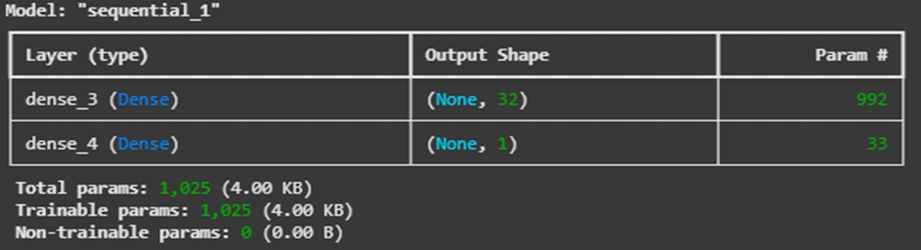

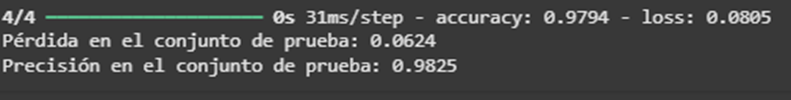


- Lo mismo se realizó para el segundo dataset, en el que se eliminaron los outliers después de la transformación y los datos son los siguientes

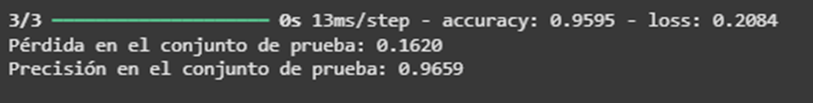




# 4. Entrenamiento del modelo:

  – Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
  
  – Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

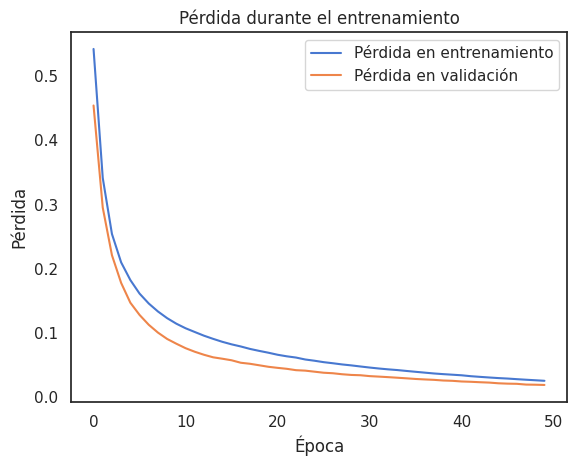

In [130]:
# Graficar la pérdida durante el entrenamiento y la validación
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

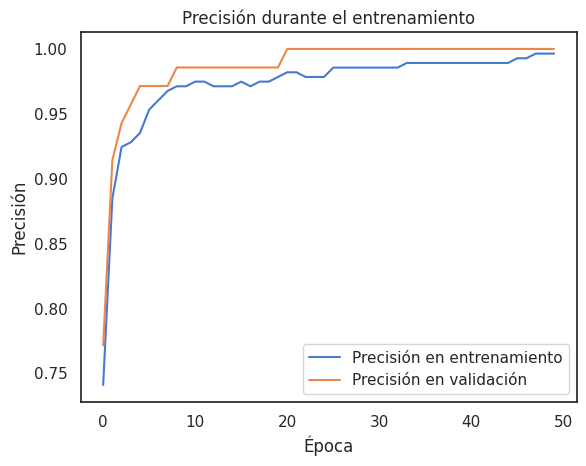

In [131]:
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Análisis

- Del primer dataset (el que conserva los outliers después de la transformación), se observa que en al primera gráfica parece haber una buena convergencia, si bien la pérdida disminuye rápidamente al inicio y luego se estabiliza, la curva de validación parece estar quedándose por encima de la de entrenamiento después de varas épocas, y eso según revisando puede indicar un leve sobreajuste,

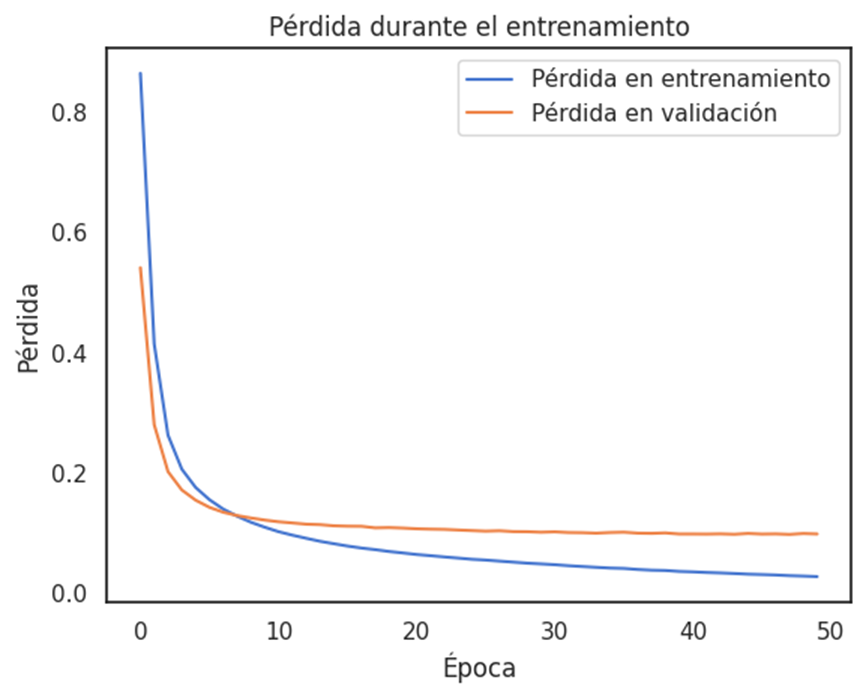


- Con el segundo gráfico también queda entre dicho el tema del sobre ajuste, ya que, si bien la precisión en entrenamiento sigue aumentando hasta casi 100%, en la validación esta se “estabiliza” alrededor del 95%,

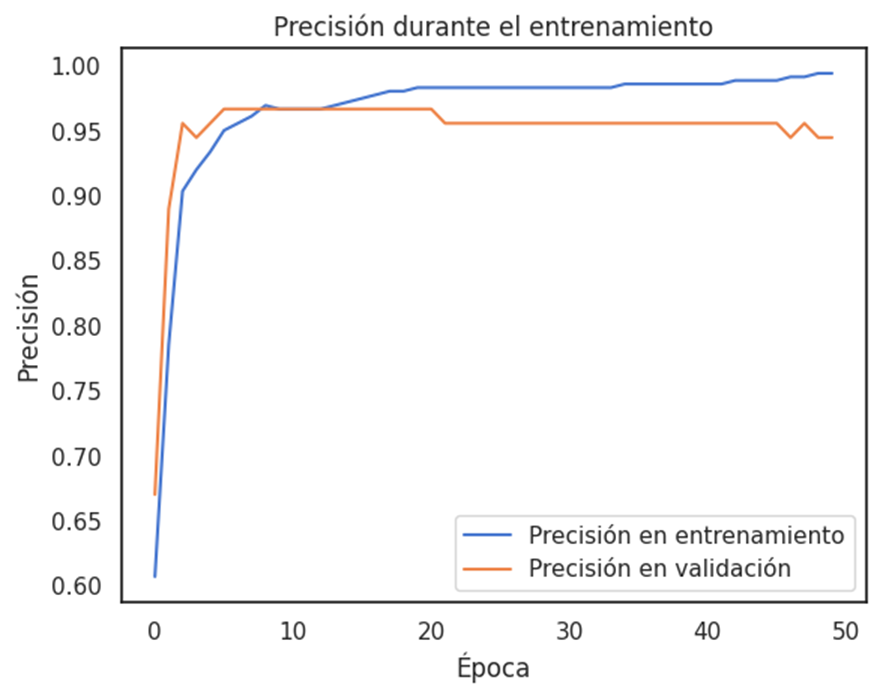


- En el caso del segundo dataset (el que está graficado en el código), aquel donde se eliminaron los outliers después de la transformación, ambas curbas en la pérdida están más parejas, pero en cuanto a la precisión están demasiado ajustadas, lo que podría sugerir como tal un sobreajuste más estrecho en este caso que en el anterior

# 5. Evaluación del modelo:

  – Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
  
  – Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

In [132]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test2)

y_pred_classes = (y_pred > 0.5).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test2, y_pred_classes)
recall = recall_score(y_test2, y_pred_classes)
f1 = f1_score(y_test2, y_pred_classes)

# Mostrar las métricas
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print('')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test2, y_pred_classes)
print("Matriz de confusión:")
print(conf_matrix)
print('')

# Reporte de clasificación
print("Reporte de clasificación:")

print(classification_report(y_test2, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Precisión (Accuracy): 0.9659
Recall: 0.8636
F1-score: 0.9268

Matriz de confusión:
[[66  0]
 [ 3 19]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.86      0.93        22

    accuracy                           0.97        88
   macro avg       0.98      0.93      0.95        88
weighted avg       0.97      0.97      0.97        88



## Análisis

- con el dataset 1, se obtuvieron las siguientes métricas

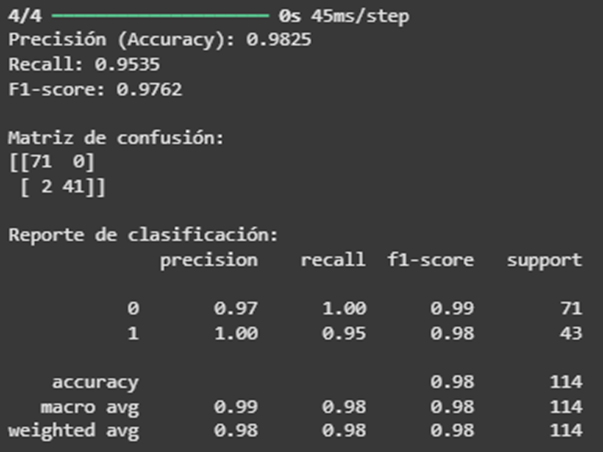

- Estas son métricas buenas, y bastante altas, incluso en la matriz de confusión





- Con el dataset 2, cuyas métricas son las del resultado del código

- en cuanto a las métricas en general todas estas disminuyen al haberse eliminado outliers después de la transformación

- Sin outliers, el modelo detectó menos falsos positivos (0 vs. 2 antes), pero ahora tiene más falsos negativos (3 vs. 2 antes).

- Según parece, al eliminarse los outliers después de la transformación, se eliminaron datos "clave" de la clase minoritaria (clase 1), lo que podría haber afectado el recall.